## Desarrollo de algoritmo para simulación.
<br>
<p>El desarrollo de este algoritmo fue llevado a cabo durante el semestre agosto-diciembre 2020, como parte de la asignatura de robotica.</p>
<br>
<p>
    <li>Alumno : Jose Alfredo de Jesus Aguiar Arce.</li>
    <li>Numero de control : 15400806.</li>
    <li>Materia : Robotica.</li>
    <li>Maestro : Dr. Antonio Guzman Navarrete.</li>
</p>

<br>Requiere que los archivos 'sim.py', 'simConst.py', 'remoteapi.dll' estén alojados en la misma carpeta que este cuaderno de Jupyter.
<br>Desde CoppeliaSim, abrir la escena 'DeskBot_scena.ttt'

### Instrucciones para preparar la simulacion.
<br>1. Abra la escena 'DeskBot_scena.ttt'
<br>2. Seleccionando la base del robot desde la jerarquía de escena, presione botón derecho del mouse y agregue un archivo de script mediante <b> Add -> Associated child script -> Non threaded </b>. Aparecerá un pequeño ícono de documento junto al nombre del robot en la escena de jerarquía.
<br>3. En el script es posible incluir código de programación, escritos en lenguaje LUA. Para nuestro caso, todo el código que requeriremos es habilitar el API remoto, asignando un puerto de comunicación. En la función <b>sysCall_init()</b> agregue la siguiente línea:
<br> 
<font face = "Monospace"> <pre> simRemoteApi.start(19999)</font>
<br> Proceda a continuación con las actividades:

# Seccion 1.- Simulacion y coneccion con coppelia.

In [50]:
# importamos las librerías necesarias
import sim          # librería para conectar con CoppeliaSim
import sympy as sp  # librería para cálculo simbólico
import numpy as np

<p>Configuraciones del servidor local</p>

In [51]:
#Variables para configurar entorno del servidor y port
localhost = '127.0.0.1'  #Servidor local de la computadora
port = 19999  #Puerto para coneccion con V-rep

### Configuramos el servidor y el port

El siguiente codigo deberia ejecutarse una vez que se presiona play en la simulacion, de funcionar correctamente el cliente quedara conectado con la API de V-rep.

In [52]:
def connect(port):
# Establece la conexión a VREP
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # Cierra ports abiertos en caso de haber
    clientID=sim.simxStart(localhost,port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID


In [53]:
# Requerimos los manejadores para las articulaciones y el Dummy
clientID = connect(19999)

conectado a 19999


### Configuramos el programa y obtenemos objetos de la simulacion.

obtendermos las juntas y objetos de la simulacion para asignarlos a variables con las que nos podremos referir en el codigo.
De esta forma trabajaremos con POO (Programacion Orientada a Objetos) en nuestro programa.

In [54]:
#Variables para configurar entorno 
#Estas variables se agregaron dado que la simulacion fuera a modificarse y por ende sus valores 
#tales como rangos de juntas prismaticas, nombres de juntas etc.

#Como esta nombrada la junta revoluta de dicho eslabon
nombre_junta_eslabon_1 = 'eslabon_1' #la primera junta revoluta acoplada a la corredera
nombre_junta_eslabon_2 = 'eslabon_2' #la segunda junta revoluta acoplada a el eslabon anterior

#Como esta nombrada la junta prismatica de dicho eslabon
nombre_junta_corredera = 'Corredera'
nombre_junta_efector = 'junta_efector'

#Como esta nombrado el dummy que sirve como punto final del efector
dummy_posicion = 'posicion_final'

#Valores de los rangos minimos y maximos de juntas prismaticas (en metros) dado que las funciones se encargan
#de transformar en decimales necesarios 
min_corredera,max_corredera = [0,0.3]
min_efector,max_efector = [-0.04,0.04]

print(f'El nombre en la simulacion de la junta revoluta del eslabon 1 debe ser "{nombre_junta_eslabon_1}"')
print(f'El nombre en la simulacion de la junta revoluta del eslabon 2 debe ser "{nombre_junta_eslabon_2}"')
print(f'El nombre en la simulacion de la junta prismatica de la corredera debe ser "{nombre_junta_corredera}", limite minimo : {min_corredera} mts, limite maximo {max_corredera}')
print(f'El nombre en la simulacion de la junta prismatica del efector final debe ser "{nombre_junta_efector}"", limite minimo : {min_efector} mts, limite maximo {max_efector}')
print(f'El nombre en la simulacion del dummy para obtner posciones finales como comprobacion es "{dummy_posicion}"')

El nombre en la simulacion de la junta revoluta del eslabon 1 debe ser "eslabon_1"
El nombre en la simulacion de la junta revoluta del eslabon 2 debe ser "eslabon_2"
El nombre en la simulacion de la junta prismatica de la corredera debe ser "Corredera", limite minimo : 0 mts, limite maximo 0.3
El nombre en la simulacion de la junta prismatica del efector final debe ser "junta_efector"", limite minimo : -0.04 mts, limite maximo 0.04
El nombre en la simulacion del dummy para obtner posciones finales como comprobacion es "posicion_final"


In [55]:
#Manejadores de juntas revolutas

# Obtenemos el manejador de las juntas (joints), y se asignaran a una variable
returnCode,junta_1 = sim.simxGetObjectHandle(clientID,nombre_junta_eslabon_1,sim.simx_opmode_blocking)
returnCode,junta_2 = sim.simxGetObjectHandle(clientID,nombre_junta_eslabon_2,sim.simx_opmode_blocking)
#Imprimimos los id de cada junta
print(f"EL ID de junta_1 = {junta_1}, el ID de junta_2 = {junta_2}")


#Manejadores de juntas prismaticas

#Obtenemos el manejador de la corredera que se coloca en la base
returnCode,corredera = sim.simxGetObjectHandle(clientID,nombre_junta_corredera,sim.simx_opmode_blocking)
#Obtenemos el manejador del efector final
returnCode,efector_cilindro = sim.simxGetObjectHandle(clientID,nombre_junta_efector,sim.simx_opmode_blocking)
#Imprimimos el id de cada junta
print(f"El ID de corredera es = {corredera}, el ID del efector final es {efector_cilindro}")


#Manejador del dummy, que funciona para comprobar la posicion final del efector final.

returnCode,posicion_dummy = sim.simxGetObjectHandle(clientID,dummy_posicion,sim.simx_opmode_blocking)
#Imprimimos el id 
print(f"El ID del dummy es = {posicion_dummy}")

EL ID de junta_1 = 17, el ID de junta_2 = 18
El ID de corredera es = 16, el ID del efector final es 28
El ID del dummy es = 29


### Posicionamiento en el simulador

Funciones y demostraciones sobre el como se realiza la simulacion sin entrar en detalles de cinematica aun.
Son las funciones necesarias para modificar en la simulacion posiciones.

In [56]:
#la posicion para juntas revolutas se asignara mediante grados 
#Los angulos deben enviarse en radianes, dado que se trabaja con grados se usara la expresion de la manera siguiente
# angulo_en_radianes = angulo_en_grados * pi / 180

angulo_1 = 0 * np.pi/180  #El angulo convertido a radianes para la junta 1.
angulo_2 = 0* np.pi/180 #El angulo convertido a radianes para la junta 2.

retCode = sim.simxSetJointTargetPosition(clientID, junta_1, angulo_1, sim.simx_opmode_oneshot)
retCode = sim.simxSetJointTargetPosition(clientID, junta_2, angulo_2, sim.simx_opmode_oneshot)

#La posicion para juntas prismaticas se asignara representada en distancia.
#La distancia debe ser representada entre [pos.min] y [pos.range] , ambos parametros que se han definido en la simulacion, 
#asignados al elemento (joint) corredera.

#Dado que se debe encontrar expresado en Metros la ecuacion sera la siguiente
#distancia_en_metros = distancia / 100
#Para esta configuracion distancia debe ir de 'min_corredera' hasta 'max_corredera' en el caso de la corredera
distancia = 0
#Para esta configuracion distancia debe ir de 'min_efector' hasta 'max_efector' en el caso del efector final
distancia_efector = -0.040 

retCode = sim.simxSetJointTargetPosition(clientID, corredera,distancia, sim.simx_opmode_oneshot)
retCode = sim.simxSetJointTargetPosition(clientID, efector_cilindro,distancia_efector, sim.simx_opmode_oneshot)
print(retCode)

1


Dadas las observaciones anteriores se escribieron dos metodos para ahorrar escritura y simplificar la implementacion

In [57]:
def mover_junta_revoluta(junta,angulo):
    """
    Esta funcion permite realizar una rotacion en la junta revoluta desde el angulo actual hasta el deseado (grados)
    """
    radianes = angulo * np.pi/180
    
    #Regresa 0 si se ejecuta correctamente
    return sim.simxSetJointTargetPosition(clientID, junta, radianes, sim.simx_opmode_oneshot) 

#Ejemplo de como se usa este metodo
# mover_junta_revoluta(junta_1,-90)
# mover_junta_revoluta(junta_2,90)

def mover_junta_prismatica(junta,distancia_desde_origen):
    """
    Esta funcion permite realizar un dezplazamiento en la junta prismatica (debe estar expresada en centimetros)
    en un rango entre [Pos Min - Pos Range] de la junta prismatica en cuestion
    """
    
    distancia = distancia_desde_origen
    #Regresa 0 si se ejecuta correctamente
    return sim.simxSetJointTargetPosition(clientID, junta,distancia, sim.simx_opmode_oneshot)

#Ejemplo de como se usa este metodo
# mover_junta_prismatica(corredera,0.2)
# mover_junta_prismatica(efector_cilindro,0.04)

def get_posicion_dummy():
    return sim.simxGetObjectPosition(clientID,posicion_dummy,-1,sim.simx_opmode_streaming);

#get_posicion_dummy()

Algunas utilidades realizadas para facilitar la escritura de posiciones comunes

In [58]:
def abajo_corredera():
    """
    Envia la corredera a su posicion minima, en el eje Z.
    """
    mover_junta_prismatica(corredera,min_corredera)


def arriba_corredera():
    """
    Envia la corredera a su posicion maxima, en el eje Z.
    """
    mover_junta_prismatica(corredera,min_corredera)

def abrir_efector():
    """
    activa el efector , es decir lo baja.
    """
    mover_junta_prismatica(efector_cilindro,min_efector)

def cerrar_efector():
    """
    desactiva el efector , es decir lo sube. 
    """
    mover_junta_prismatica(efector_cilindro,max_efector)


def reiniciar_robot():
    """
    Deja el robot en su posicion inicial 
    """
    cerrar_efector()
    abajo_corredera()
    mover_junta_revoluta(junta_1,0)
    mover_junta_revoluta(junta_2,0)

def mover_robot_cinematica_directa(angulo_eslabon_1,angulo_eslabon_2,posicion_corredera,posicion_efector,):
    """
    Este metodo se basa en los metodos que se tocan mas adelante en este documento/codigo, donde obtenidas las ecuaciones de 
    cinematica directa de consigue obtener una posicion en el efector final, mediante la posicion de todos los grados de libertad. 
    """
    #Mover juntas prismaticas
    mover_junta_prismatica(corredera,posicion_corredera)
    mover_junta_prismatica(efector_cilindro,posicion_efector)
    #Mover juntas revolutas
    mover_junta_revoluta(junta_1,angulo_eslabon_1)
    mover_junta_revoluta(junta_2,angulo_eslabon_2)
    


## Seccion 2.- Obtencion de modelo cinematico directo, ecuaciones y funciones.

### Cinematica directa del modelo por D-H

Se realiza un algoritmo de Denavit-Hartenberg para resolver el modelo cinematico directo del robot.

#### 1.- Librerias utilizadas para calculos simbolicos

In [59]:
# importamos las librerías necesarias
import sim          # librería para conectar con CoppeliaSim
import sympy as sp  # librería para cálculo simbólico
import numpy as np

from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)
from sympy.physics.mechanics import dynamicsymbols

#### 2.- Variables simbolicas

In [60]:
#Variables simbolicas para la obtencion de la matriz DH
theta, alpha, a, d = dynamicsymbols('theta alpha a d')
#Imprimimos las variables
theta, alpha, a, d 

(theta, alpha, a, d)

#### 3.- Matrices de rotacion y obtencion de matriz D-H

In [61]:
#Definimos las matrices de rotacion y traslacion correspondientes

#Rotacion en Z
rz = sp.Matrix([[sp.cos(theta),-sp.sin(theta),0,0],
               [sp.sin(theta),sp.cos(theta),0,0],
               [0,0,1,0],
               [0,0,0,1]])

#Traslacion en Z
tz = sp.Matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,d],
               [0,0,0,1]])

#Traslacion en X
tx = sp.Matrix([[1,0,0,a],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

#Rotacion en X
rx = sp.Matrix([[1,0,0,0],
               [0,sp.cos(alpha),-sp.sin(alpha),0],
               [0,sp.sin(alpha),sp.cos(alpha),0],
               [0,0,0,1]])

#Matriz de rotacion de parametros D-H
DH = rz*tz*tx*rx
#Se muestra la matriz A resultado de la operacion anterior
DH

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

#### 4.- Agregamos de uno en uno los grados de libertad correspondientes.

Se sustituyen la matriz D-H los parametros theta,d,a,alpha.
<br>En base a la tabla obtenida por nosotros mismos referente al robot diseñado
<br><br>
Donde : 
<p>
    <li>theta = La rotacion en Z.</li>
    <li>d = Desplazamiento en Z.</li>
    <li>a = Desplazamiento en X.</li>
    <li>alpha = La rotacion en X.</li>
</p>

In [62]:
#Variables simbolicas para sustituir en la matriz homogenea (DH)
l1,d1, theta2, d2, theta3, d3, l4 = dynamicsymbols('l1 d1 theta2 d2 theta3 d3 l4')
#Imprimimos las variables
l1,d1, theta2, d2, theta3, d3, l4

(l1, d1, theta2, d2, theta3, d3, l4)

De estas variables se obserba lo siguiente : 

<p>
    <li>l1 = La distancia que recorre la corredera en el eje Z. </li>
    <li>theta2 = La rotacion en el eje Z que realiza el eslabon 1. </li>
    <li>d2 = El desplazamiento en X que recorre el eslabon 1. </li>
    <li>theta3 = La rotacion en el eje Z que realiza el eslabon 2. </li>
    <li>d3 = El desplazamiento en X que recorre el eslabon 2. </li>
    <li>l4 = La distancia que recorre el efector final en el eje Z. </li>

##### Eslabon corredera

In [63]:
rot_corredera = DH.subs({theta:0, d:l1, a:d1, alpha:0 })
#imprimimos la matriz
rot_corredera

Matrix([
[1, 0, 0, d1],
[0, 1, 0,  0],
[0, 0, 1, l1],
[0, 0, 0,  1]])

##### Eslabon 1

In [64]:
rot_eslabon1 = DH.subs({theta:theta2, d:0, a:d2, alpha:0 })
#imprimimos la matriz
rot_eslabon1

Matrix([
[cos(theta2), -sin(theta2), 0, d2*cos(theta2)],
[sin(theta2),  cos(theta2), 0, d2*sin(theta2)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

##### Eslabon 2

In [65]:
rot_eslabon2 = DH.subs({theta:theta3, d:0, a:d3, alpha:0 })
#imprimimos la matriz
rot_eslabon2

Matrix([
[cos(theta3), -sin(theta3), 0, d3*cos(theta3)],
[sin(theta3),  cos(theta3), 0, d3*sin(theta3)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

##### Efector final 

In [66]:
rot_efector = DH.subs({theta:0, d:l4, a:0, alpha:0 })
#imprimimos la matriz
rot_efector

Matrix([
[1, 0, 0,  0],
[0, 1, 0,  0],
[0, 0, 1, l4],
[0, 0, 0,  1]])

##### Obtencion de matriz homogenea y simplificacion

In [67]:
matriz_homogenea_resultado = (rot_corredera * rot_eslabon1 * rot_eslabon2 * rot_efector)

#Imprimimos la matriz final resultado de la ecuacion anterior
T = matriz_homogenea_resultado
matriz_homogenea_resultado

Matrix([
[-sin(theta2)*sin(theta3) + cos(theta2)*cos(theta3), -sin(theta2)*cos(theta3) - sin(theta3)*cos(theta2), 0, d1 + d2*cos(theta2) - d3*sin(theta2)*sin(theta3) + d3*cos(theta2)*cos(theta3)],
[ sin(theta2)*cos(theta3) + sin(theta3)*cos(theta2), -sin(theta2)*sin(theta3) + cos(theta2)*cos(theta3), 0,      d2*sin(theta2) + d3*sin(theta2)*cos(theta3) + d3*sin(theta3)*cos(theta2)],
[                                                 0,                                                  0, 1,                                                                       l1 + l4],
[                                                 0,                                                  0, 0,                                                                             1]])

In [68]:
matriz_homogenea_simplificada = sp.Matrix([[T[0,0].simplify(), T[0,1].simplify(), T[0,2].simplify(),T[0,3].simplify()],
                 [T[1,0].simplify(), T[1,1].simplify(), T[1,2].simplify(),T[1,3].simplify()],
                 [T[2,0].simplify(), T[2,1].simplify(), T[2,2].simplify(),T[2,3].simplify()],
                 [T[3,0].simplify(), T[3,1].simplify(), T[3,2].simplify(),T[3,3].simplify()]])

#Imprimimos la matriz ya simplificada 
matriz_homogenea_simplificada

Matrix([
[cos(theta2 + theta3), -sin(theta2 + theta3), 0, d1 + d2*cos(theta2) + d3*cos(theta2 + theta3)],
[sin(theta2 + theta3),  cos(theta2 + theta3), 0,      d2*sin(theta2) + d3*sin(theta2 + theta3)],
[                   0,                     0, 1,                                       l1 + l4],
[                   0,                     0, 0,                                             1]])

#### 5.- Obtener las ecuaciones de Cinematica

De la matriz obtenida por Denavit Hartenberg (D-H), se obtienen las ecuaciones para cinematrica Directa.

In [69]:
#Dado que la ultima columna representa el posicionamiento del robot obtenemos dicho vector
posiciones = matriz_homogenea_simplificada[0:3,3] #Vector de posiciones 4 columna de la matriz homogenea

#Ecuaciones de posicion x,y,z
pos_x = posiciones[0]
pos_y = posiciones[1]
pos_z = posiciones[2]

#Imprimimos el vector de posiciones
posiciones

Matrix([
[d1 + d2*cos(theta2) + d3*cos(theta2 + theta3)],
[     d2*sin(theta2) + d3*sin(theta2 + theta3)],
[                                      l1 + l4]])

De estas ecuaciones de posicion se desprenden las siguientes funciones para obtener su pocision dados los parametros deseados.

In [70]:
#dado que el desplazamiento en X para ambos eslabones es fijo, pues depende de la longitud como tal del eslabon.
d_1 = (125  + 63.01) / 1000 # 125 mm + 63.01 mm , representan el ajusto de desplazamiento en X sobre la corredera.
d_2 = 200 / 1000 #206 mm
d_3 = 200 / 1000 #206 mm

#Funciones de cinematica directa del mecanismo
def get_posicion_x(angulo_eslabon_1,angulo_eslabon_2):
    """
    Resuelve la ecuacion de posicion en el eje x, y regresa su resultado.
    """
    return  pos_x.subs({d1 : d_1, d2: d_2 , d3: d_3,  theta2 : angulo_eslabon_1, theta3 : angulo_eslabon_2})

def get_posicion_y(angulo_eslabon_1,angulo_eslabon_2):
    """
    Resuelve la ecuacion de posicion en el eje y, y regresa su resultado.
    """
    return  pos_y.subs({d2: d_2 , d3: d_3,  theta2 : angulo_eslabon_1, theta3 : angulo_eslabon_2})

def get_posicion_z(desplazamiento_corredera, desplazamiento_efector_final):
    """
    Resuelve la ecuacion de posicion en el eje z, y regresa su resultado.
    """
    #Dada la simplicidad de la ecuacion de posicion en Z , se reajusta con una distancia producto de los ensambles no contemplados anteriormente.
    ajuste_z = pos_z.subs({l1 : desplazamiento_corredera, l4 : desplazamiento_efector_final}) + 0.1196 #ajuste en mm, 1.196 * 10 a la -1
    return  ajuste_z

def get_posicion_cinematica_directa(angulo_eslabon_1,angulo_eslabon_2,desplazamiento_corredera,desplazamiento_efector_final):
    """
    Regresa el vector posicion x,y,z. Este vector representa los resultados de los calculos matematicos, son una aproximacion
    al valor que deberia tener la punta final del efector final.
    
    """
    vector_posicion_final = sp.Matrix([[get_posicion_x(angulo_eslabon_1,angulo_eslabon_2)],
                                      [get_posicion_y(angulo_eslabon_1,angulo_eslabon_2)],
                                      [get_posicion_z(desplazamiento_corredera,desplazamiento_efector_final)]])
    return vector_posicion_final



#### 6.- Obtener el espacio del robot.

Evaluaremos la posicion numerica de nuestro robot, dadas las ecuaciones de cinematica directa.

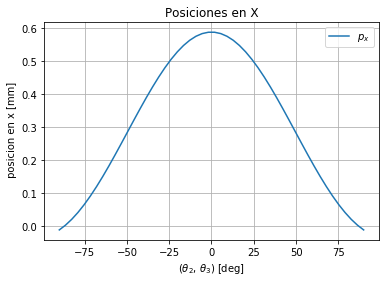

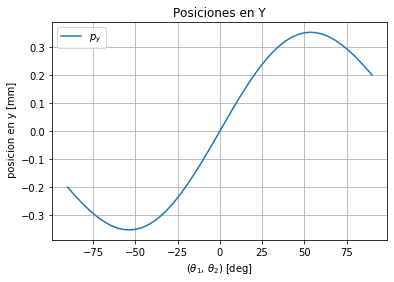

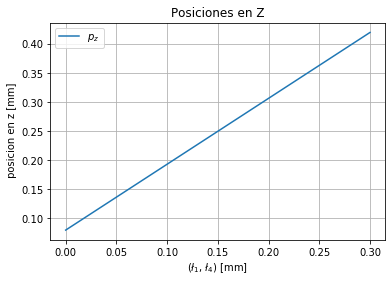

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

#Se evaluaran las funciones de posicion con sus respectivas variables

fx = sp.lambdify((d1, d2, d3, theta2, theta3), pos_x, 'numpy')
fy = sp.lambdify((d2, d3, theta2, theta3), pos_y, 'numpy')
fz = sp.lambdify((l1,l4), pos_z, 'numpy')


#Definimos las muestras de nuestro espacio, estan en este caso basadas en los GDL del robot

theta2s = np.linspace(d2r(-90), d2r(90)) # desired range of motion for joint 1
theta3s = np.linspace(d2r(-90), d2r(90)) # desired range of motion for joint 2
l1s = np.linspace(0, 0.3) # desired range of motion for joint 2
l4s = np.linspace(-0.04,0) # desired range of motion for joint 2

zx = np.array(fx(d_1,d_2,d_3, theta2s, theta3s))
zy = np.array(fy(d_2, d_3, theta2s, theta3s))
zz = np.array(fz(l1s,l4s))

zz = zz + 0.1196 #ajustamos el valor de z


fig, ax1 = plt.subplots()
ax1.set_title('Posiciones en X')
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.set_xlabel(r'($\theta_2$, $\theta_3$) [deg]')
ax1.set_ylabel(r' posicion en x [mm]')
plt.legend()
plt.grid()

fig, ax2 = plt.subplots()
ax2.set_title('Posiciones en Y')
ax2.plot(np.rad2deg(theta2s), zy, label = r'$p_y$')
ax2.set_xlabel(r'($\theta_1$, $\theta_2$) [deg]')
ax2.set_ylabel(r' posicion en y [mm]')
plt.legend()
plt.grid()

fig, ax3 = plt.subplots()
ax3.set_title('Posiciones en Z')
ax3.plot(l1s, zz, label = r'$p_z$')
ax3.set_xlabel(r'($\l_1$, $\l_4$) [mm]')
ax3.set_ylabel(r' posicion en z [mm]')
plt.legend()
plt.grid()


## Seccion 3.-  Ejecutando la primera simulacion y calculo de error.

Una vez conseguidas las ecuaciones correspondientes, los metodos y funciones necesarias para generar un movimiento controladp en el robot se ejecuta el siguiente codigo.<br><br>

<li>Se colocara al robot en una posicion mediante los metodos explicados en la seccion 1.</li>
<li>Posterior a eso se calculara con los mismos angulos y traslaciones indicadas la posicion final que deberia tener en teoria nuestro modelo robotico basados en los metodos de la seccion 2.</li>

<br>
Para ello debemos considerar: <br>
<li>A1 = Al angulo que tomara el eslabon 1.</li>
<li>A2 = Al angulo que tomara el eslabon 2.</li>
<li>LC = Dezplazamiento que tomara la corredera en el eje Z.</li>
<li>LF = Dezplazamiento que tomara el efector final en el eje Z.</li>


In [134]:
# Conectamos con CoppeliaSim
clientID = connect(19999)

#Variables para simulacion y calculos

A1 = 0 #Grados , eslabon 1.
A2 = 0#Grados, eslabon 2.
LC = 0.3 # mm, movimiento en z, corredera.
LF = 0.04 # mm, movimiento en z, efector final.

#ejecutamos en la simulacion un movimiento
mover_robot_cinematica_directa(A1,A2,LC,LF)
#Calculamos por cinematica directa la posicion del efector final 
pos_cinematica_directa = get_posicion_cinematica_directa(A1,A2,LC,LF)
pos_cinematica_directa = pos_cinematica_directa.transpose() # posicion calculada para [x,y,z] respectivamente
pos_cinematica_directa

conectado a 19999


Matrix([[0.58801, 0, 0.4596]])

Una vez llegado al punto deseado obtenemos la posicion del dummy para comprobar que los calculos esten correctos

In [136]:
#Obtenemos la posicion real del efector fin en la simulacion, del dummy , [x,y,z] respectivamente
pos_sim = get_posicion_dummy()[1]
pos_sim

[0.5645363330841064, -0.012711401097476482, 0.4200233817100525]

Calculamos el error entre el valor calculado y el valor real en la simulacion

In [148]:
#Se calcula el error absoluto
error_x = abs(pos_sim[0] - pos_cinematica_directa[0]) # error en mm respecto del valor calculado
error_y = abs(pos_sim[1] - pos_cinematica_directa[1]) # error en mm respecto del valor calculado
error_z = abs(pos_sim[2] - pos_cinematica_directa[2]) # error en mm respecto del valor calculado
print(f'Error absoluto en X : {error_x}')
print(f'Error absoluto en Y : {error_y}')
print(f'Error absoluto en Z : {error_z}')

#Se calcula el error relativo
error_x = (error_x / pos_sim[0] )* 100
error_y = (error_y / pos_sim[0] )* 100
error_z = (error_z / pos_sim[0] )* 100

print(f'Error del valor calculado con respecto al real en X, es de : {error_x} %')
print(f'Error del valor calculado con respecto al real en Y, es de : {error_y} %')
print(f'Error del valor calculado con respecto al real en Z, es de : {error_z} %')

Error absoluto en X : 0.0234736669158935
Error absoluto en Y : 0.0127114010974765
Error absoluto en Z : 0.0395766182899475
Error del valor calculado con respecto al real en X, es de : 4.15804360857608 %
Error del valor calculado con respecto al real en Y, es de : 2.25165332194530 %
Error del valor calculado con respecto al real en Z, es de : 7.01046433517171 %


## Seccion 4 .- Simulaciones de muestra

In [153]:
import time

def delay(tiempo_en_segundos):
    """
    Hace un retardo antes de seguir ejecutando el programa
    """
    time.sleep(tiempo_en_segundos)   # Delays for 5 seconds. You can also use a float value.


### Simulacion 1.- Juego de coordenadas preestablecidas